# Notebook do Jeff.

Atividades da análise exploratória, de acordo com as notas de aula do Ogasawara:

## Identificar data objects (entidades e seus atributos)
Registrar o tipo de cada atributo (Nominal, binário, numérico)
*nominal: tipos de coisas
*binary: 0 ou 1, S e N (lembrando que pode ser simétrico ou assimétrico)
*ordinal: valores que representam relação de ordenação (ranking) das entidades ex: tamanho: p-m-g
*quantidade: numeros não discretos
*intervalo: medidas em uma escala sem um zero-point. ex> temperatura, datas do calendario, etc
*razão:  medidas em uma escala com um zero-point: ex: graus em celsius, quantidades monetárias, etc.

## Fazer descrições estatísticas dos dados:
Centralidade e características de dispersão (Ex. mediana, max, min, quantis, outliers, variancia, etc).
Dimensões numéricas: 
    dispersão em intervalos de multipla granularidade: boxplots em intervalos computados. 
    dispersão em métricas computadas: boxplots no cubo transformado (datawarehouse)
 
Exemplos de aula: 
*média, mediana, moda
*distribuição normal, assimétrica (positiva/negativa)
*quartis, faixa inter-quartis, sumário de 5 numeros (min, q1, mediana, q2, max): boxplot
*variância e desvio-padrão.

Fazer a descrição através de gráficos boxplot, histogramas, qualtile plot, scatter plot.

**Identificar outliers**: valores maiores que Q3 + 1,5*IQR ou menores que Q1 - 1,5*IQR

## Aplicar outras técnicas
Matriz de dados  
Matriz de dissimilaridade  
 (ver slides sobre Medidas de proximidade e dissimilaridade)





## Arquivos de dados  
Conforme descrição do Ogasawara em [Brazilian Flight Dataset](http://eic.cefet-rj.br/~eogasawara/brazilian-flight-datasets/):  
**airports-br.xlsx** - Lista de aeroportos. Não fornecido. Usaremos o do Gustavo: [airports.dat](https://openflights.org/data.html).  
**vra.RData** - todos os dados sobre voos, de jan/2009 a dez/2017.  
**airports_hist.xlsx** - Não fornecido. Seriam os histogramas das atividades dos 62 principis aeroportos, correspondendo a 92% do tráfego monitorado pela ANAC.  
**wu.RData** - informações sobre o clima nos principais 62 aeroportos.  
**vra-wu.RData** - informações sobre os voos, com dados do clima na partida e chegada nessses 62 aeroportos.  




## Questões suscitadas
1. Qual é o percentual de voos atrasados em relação ao total 
  1. por ano?
  1. por aeroporto?
  1. por companhia aérea?
  1. por mês do ano?
  1. por umidade/temperatura/pressão?
  1. por visibilidade?
  1. por condições climáticas?
1. É possível identificar a propagação de atrasos (ex. atraso em POA = atraso em CGH)?
1. É possível identificar algum *trigger* meteorologico que sirva como preditor de atrasos?
1. É possível correlacionar esse trigger com os atrasos (Ex. CHUVA em POA = atraso em CGH)?
1. Quais foram as datas com maior quantidade de delays?
1. Há correlação entre as condições meteorológicas e os atrasos? (ou haverá outros motivos que os expliquem?)
1. Quais são as justificativas mais frequentes para os atrasos?


### Arquivo **wu.RData**

In [28]:
load("dados/wu.RData") 
head(wu)

data.airport,data.date,data.hour,data.temperature,data.dew_point,data.humidity,data.pressure,data.visibility,data.events,data.conditions
SBGR,2009-01-01,00:00,20,19,94,1016,NA,,Mist
SBGR,2009-01-02,00:00,20,19,94,1015,NA,,Clear
SBGR,2009-01-03,00:00,21,20,94,1012,10,Rain,Rain
SBGR,2009-01-04,00:00,21,19,94,1008,10,"Rain , Thunderstorm",Thunderstorms and Rain
SBGR,2009-01-05,00:00,16,16,100,1015,10,Rain,Mostly Cloudy
SBGR,2009-01-06,00:00,16,14,88,1017,10,,Mostly Cloudy


In [29]:
    summary(wu)

 data.airport        data.date          data.hour         data.temperature
 Length:4438934     Length:4438934     Length:4438934     Min.   : 0.00   
 Class :character   Class :character   Class :character   1st Qu.:20.00   
 Mode  :character   Mode  :character   Mode  :character   Median :24.00   
                                                          Mean   :23.39   
                                                          3rd Qu.:27.00   
                                                          Max.   :90.00   
                                                          NA's   :56735   
 data.dew_point   data.humidity    data.pressure    data.visibility  
 Min.   : 0.00    Min.   :  0.00   Min.   :   0.0   Min.   :    0.0  
 1st Qu.:15.00    1st Qu.: 60.00   1st Qu.:1011.0   1st Qu.:   10.0  
 Median :19.00    Median : 74.00   Median :1014.0   Median :   10.0  
 Mean   :18.19    Mean   : 70.78   Mean   : 972.9   Mean   :   64.8  
 3rd Qu.:22.00    3rd Qu.: 88.00   3rd Qu.:1017.0 

WU: 
1. converter o campo *data.date* de character para date 
1. decompor o novo campo em ano, mes, dia
1. converter o campo *data.time* de character para time
1. decompor o novo campo em hora, minuto
1. descartar outliers de data.visibility
1. descartar outliers de data.umidade
1. fazer lista de data.events únicos
1. fazer lista de data.conditions únicos

Explicação sobre influencia do dew point na formação de chuva e neblina [aqui](https://pt.wikipedia.org/wiki/Ponto_de_orvalho) 



In [30]:
objects()

[1] "grBoxDew"    "grBoxHumid"  "grBoxTemp"   "grHistDew"   "grHistHumid"
 [6] "grHistPress" "grHistTemp"  "grHistVis"   "temperature" "wu"

In [31]:
library(ggplot2)
library(gridExtra)
#grHistTemp = ggplot(wu, aes(x = data.temperature)) + geom_histogram(binwidth = 1)
#grHistDew = ggplot(wu, aes(x = data.dew_point)) + geom_histogram(binwidth = 1)
#grHistHumid = ggplot(wu, aes(x = data.humidity)) + geom_histogram(bins = 1000)
#grHistPress = ggplot(wu, aes(x = data.pressure)) + geom_histogram(bins = 10)
#grHistVis = ggplot(wu, aes(x = data.visibility)) + geom_histogram(binwidth = 1)



Warning message:
“Removed 56735 rows containing non-finite values (stat_bin).”Warning message:
“Removed 185961 rows containing non-finite values (stat_bin).”Warning message:
“Removed 59859 rows containing non-finite values (stat_bin).”Warning message:
“Removed 131282 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1178872 rows containing non-finite values (stat_bin).”

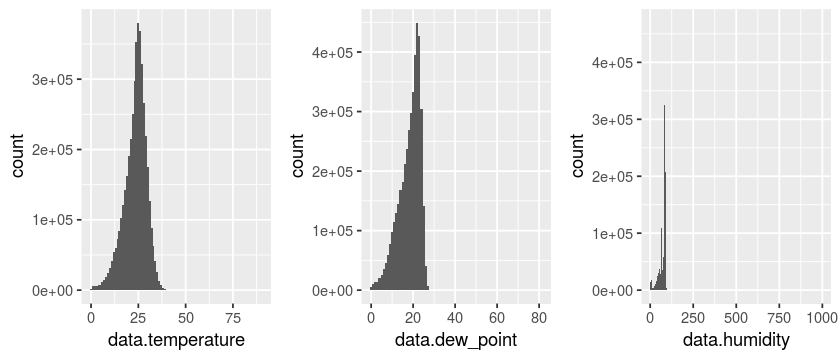

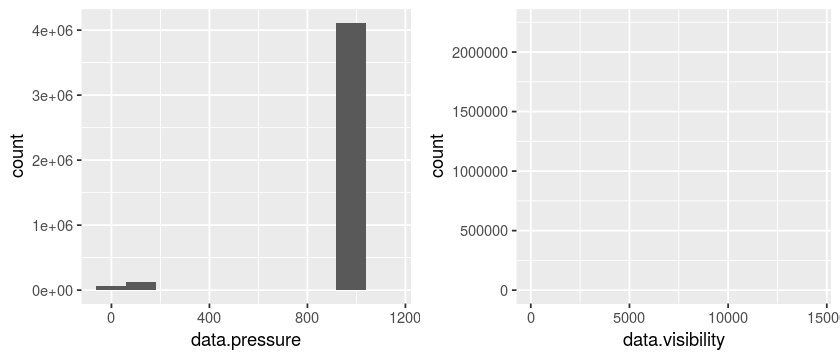

In [32]:
#options(repr.plot.width=7, repr.plot.height=3)
#grid.arrange(grobs=list(grHistTemp, grHistDew, grHistHumid ), ncol=3)
#grid.arrange(grobs=list(grHistPress, grHistVis ), ncol=2)

In [33]:
#grBoxTemp = ggplot(wu, aes(x="temp", y = data.temperature)) + geom_boxplot(outlier.colour="red")
#grBoxDew = ggplot(wu, aes(data.dew_point)) + geom_boxplot(outlier.colour="red")
#grBoxHumid = ggplot(wu, aes(data.humidity)) + geom_boxplot(outlier.colour="red")
#grid.arrange(grobs=list(grBoxTemp, grBoxDew, grBoxHumid ), ncol=3)

## Temperature

As temperaturas acima de 50 graus são descartadas porque tratam-se provavelmente de erros de medição.

In [35]:
wu$data.temperature[wu$data.temperature >= 50] <- NA

Warning message:
“Removed 56750 rows containing non-finite values (stat_bin).”Warning message:
“Removed 56750 rows containing non-finite values (stat_boxplot).”

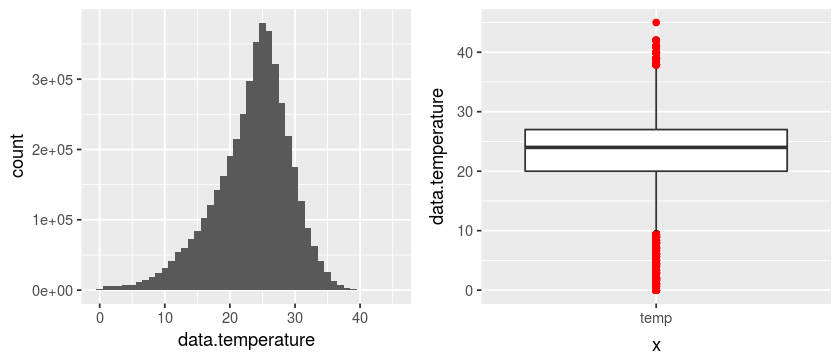

In [36]:
grHistTemp = ggplot(wu, aes(x = data.temperature)) + geom_histogram(binwidth = 1)
grBoxTemp = ggplot(wu, aes(x="Temperature", y = data.temperature)) + geom_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistTemp, grBoxTemp ), ncol=2)

## Dew Point

Pontos de orvalho acima de 50 graus são descartados porque tratam-se provavelmente de erros.

In [41]:
wu$data.dew_point[wu$data.dew_point >= 50] <- NA

Warning message:
“Removed 185969 rows containing non-finite values (stat_bin).”Warning message:
“Removed 185969 rows containing non-finite values (stat_boxplot).”

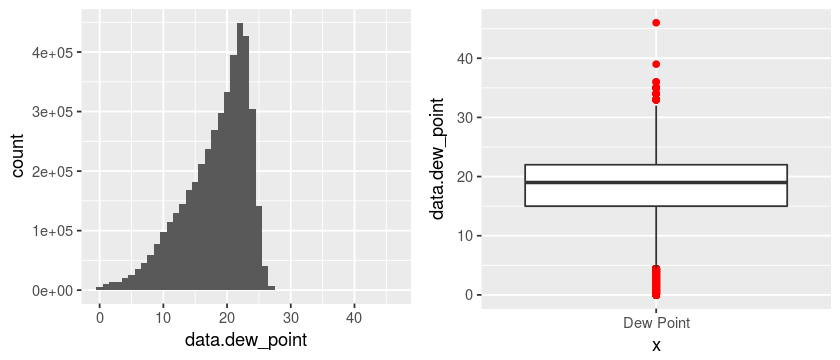

In [43]:
grHistDew = ggplot(wu, aes(x = data.dew_point)) + geom_histogram(binwidth = 1)
grBoxDew = ggplot(wu, aes(x="Dew Point", y = data.dew_point)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistDew, grBoxDew ), ncol=2)

## Humidity

Valores de Humidade acima de 100% são descartados, pois tratam-se de erros.

In [45]:
wu$data.humidity[wu$data.humidity > 100] <- NA

Warning message:
“Removed 59879 rows containing non-finite values (stat_bin).”Warning message:
“Removed 59879 rows containing non-finite values (stat_boxplot).”

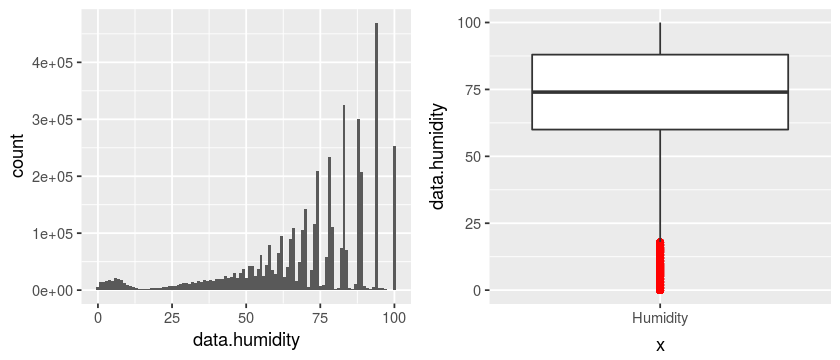

In [46]:
grHistHumid = ggplot(wu, aes(x = data.humidity)) + geom_histogram(binwidth = 1)
grBoxHumid = ggplot(wu, aes(x="Humidity", y = data.humidity)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistHumid, grBoxHumid ), ncol=2)

## Pressure

~~Valores de pressão acima de 1200 são descartados.~~ 

In [ ]:
#wu$data.pressure[wu$data.pressure > 100] <- NA

Warning message:
“Removed 131282 rows containing non-finite values (stat_bin).”Warning message:
“Removed 131282 rows containing non-finite values (stat_boxplot).”

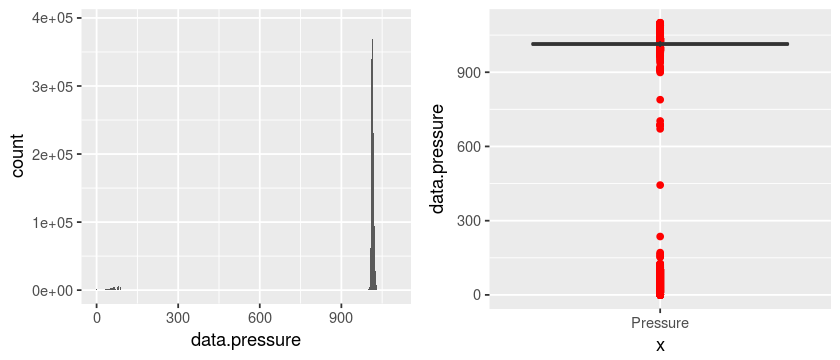

In [47]:
grHistPress = ggplot(wu, aes(x = data.pressure)) + geom_histogram(binwidth = 1)
grBoxPress = ggplot(wu, aes(x="Pressure", y = data.pressure)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistPress, grBoxPress ), ncol=2)

## Visibility

In [49]:
wu$data.visibility[wu$data.visibility > 10000] <- NA

Warning message:
“Removed 1178878 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1178878 rows containing non-finite values (stat_boxplot).”

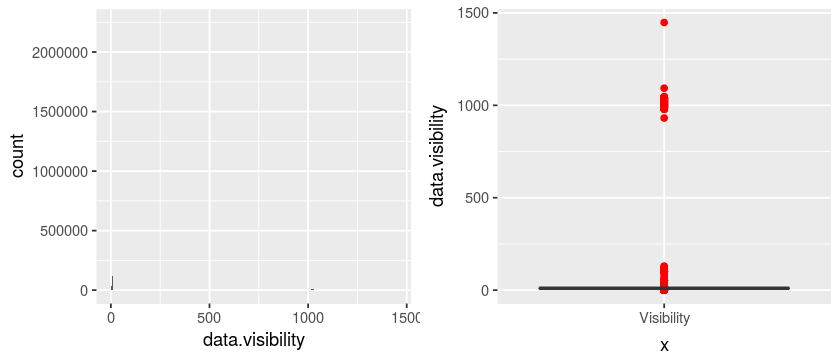

In [50]:
grHistVis = ggplot(wu, aes(x = data.visibility)) + geom_histogram(binwidth = 1)
grBoxVis = ggplot(wu, aes(x="Visibility", y = data.visibility)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistVis, grBoxVis ), ncol=2)

In [51]:
length(unique(wu$data.airport))


[1] 62

In [76]:
airports = data.frame(table(wu$data.airport))
#newdata <- mtcars[order(mpg),] 
airports <- airports[order(-airports$Freq),] 
names(airports)[names(airports)=="Var1"] <- "Airport"

In [77]:
head(airports)

,Airport,Freq
1,KJFK,78761
55,SBSV,78724
10,SBBR,78722
50,SBSG,78703
13,SBCG,78692
20,SBFL,78691


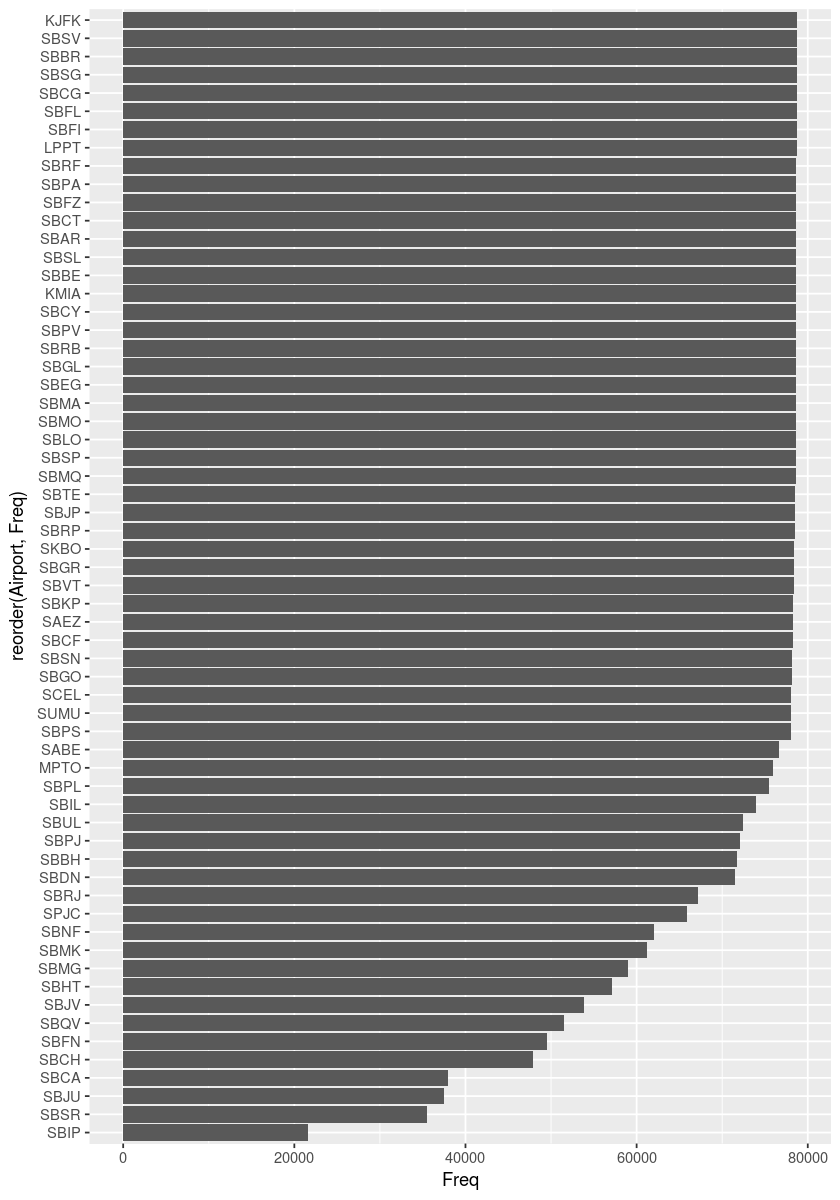

In [78]:
options(repr.plot.height=10)
ggplot(airports, aes(x=reorder(Airport, Freq), y=Freq)) + geom_bar(position="dodge",stat="identity") + coord_flip() 

